# **Patient's Condition Classification Using Drug Reviews**

In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Loading the excel file
# data = pd.read_excel('/content/sample_data/drugsCom_raw (2) (1).xlsx')
data = pd.read_excel(r'E:/ExcelR/Project_2/drugsCom_raw.xlsx')

# Display the first 5 records
data.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2015-11-03,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37


In [7]:
# Drop the 'Unnamed: 0' column if it exists
if 'Unnamed: 0' in data.columns:
    data.drop(columns='Unnamed: 0', inplace=True)

# Filter rows where the condition is one of the target conditions
target_conditions = ['Depression', 'High Blood Pressure', 'Diabetes, Type 2']
data = data[data['condition'].isin(target_conditions)]

# Reset the index to start from 0
data.reset_index(drop=True, inplace=True)

# Display the first 5 rows of the filtered data
data.head()


,drugName,condition,review,rating,date,usefulCount
0,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10,2017-03-09,54
1,Sertraline,Depression,"""1 week on Zoloft for anxiety and mood swings....",8,2011-05-07,3
2,Venlafaxine,Depression,"""my gp started me on Venlafaxine yesterday to ...",4,2016-04-27,3
3,Dulaglutide,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l...",10,2017-10-24,24
4,Effexor XR,Depression,"""This medicine saved my life. I was at my wits...",10,2013-06-20,166


In [9]:
# Display 5 random sample
data.sample(5)

,drugName,condition,review,rating,date,usefulCount
13601,Valsartan,High Blood Pressure,"""Taking for 15 years I&#039;m 67. Controls by ...",9,2015-03-31,49
6990,Amlodipine,High Blood Pressure,"""It makes me sleepy. I get phlegm all the time...",2,2017-08-31,10
12470,Desvenlafaxine,Depression,"""I suffer from episodic depression and anxiety...",9,2010-06-23,22
6781,Citalopram,Depression,"""I suffered from post traumatic stress disorde...",9,2012-07-15,46
5573,Amlodipine,High Blood Pressure,"""After taking this several weeks I began smell...",8,2016-07-02,27


In [11]:
# Size of rows and columns
data.shape

(13944, 6)

In [13]:
# Get information about columns types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13944 entries, 0 to 13943
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   drugName     13944 non-null  object        
 1   condition    13944 non-null  object        
 2   review       13944 non-null  object        
 3   rating       13944 non-null  int64         
 4   date         13944 non-null  datetime64[ns]
 5   usefulCount  13944 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 653.8+ KB


In [15]:
# Get basic statistical details of numerical columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,13944.0,6.862952,3.207061,1.0,4.0,8.0,10.0,10.0
usefulCount,13944.0,45.737880,51.782627,0.0,16.0,31.0,59.0,1291.0


In [17]:
# Basic statistics summary of Object features
data.describe(include = 'object').T

,count,unique,top,freq
drugName,13944,334,Bupropion,549
condition,13944,3,Depression,9069
review,13944,9802,"""I have suffered from severe depression/anxiet...",3


In [19]:
# Get features names
data.columns

Index(['drugName', 'condition', 'review', 'rating', 'date', 'usefulCount'], dtype='object')

In [21]:
# Filtering categorical columns
data.select_dtypes(include='object').columns

Index(['drugName', 'condition', 'review'], dtype='object')

In [23]:
# Checking duplicate values
data.duplicated().sum()

0

In [25]:
# Count of each condition
data['condition'].value_counts()

Depression             9069
Diabetes, Type 2       2554
High Blood Pressure    2321
Name: condition, dtype: int64

In [27]:
# Checking missing values in filtered data
missing = data.isnull().sum()
print("Missing values in the filtered data:")
print(missing)

Missing values in the filtered data:
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64


In [29]:
# Access the third review (index 2) in the 'review' column
data.loc[2, 'review']

'"my gp started me on Venlafaxine yesterday to help with depression and the change,a hour after taking them i was feeling very sick couldn,t stomach food or fluids, thought keep it up as she told me they did come with some side effects which would get better,took another one last night and was so ill i couldn,t stand ,being sick sweating shaking thought i was going to pass out. Did get some sleep hopeing to feel better this morning,took another one and felt so spaced out dry mouth shaking ,sick, so booked in to see gp again to make sure i should be feeling like this, only to find out she had put me on the wrong dose should have been on 37.5mg was put on 150mg, now on right dose hope this will be better"'

In [31]:
# Text cleaning
import re
import string
import nltk

# Download required NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup

stop = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Smrithi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Smrithi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Smrithi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [32]:
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

def preprocess_text(raw_review):
    review_text = BeautifulSoup(raw_review , 'html.parser').get_text() # Delete HTML
    letters_only = re.sub('[^a-zA-Z]',' ',review_text) # Make a space
    words = letters_only.lower().split()               # lower letters
    meaningful_words = [w for w in words if not w in stop] # Stopwords
    lemmitize_words = [lemmatizer.lemmatize(w) for w in meaningful_words] # Lemmitization
    return( ' '.join(lemmitize_words)) # Space join words


In [33]:
# Cleaned text
data['clean_review'] = data['review'].apply(preprocess_text)
data['clean_review']

0        taken anti depressant year improvement mostly ...
1        week zoloft anxiety mood swing take mg morning...
2        gp started venlafaxine yesterday help depressi...
3        hey guy month since last post wanted give mont...
4        medicine saved life wit end anti depressant re...
                               ...                        
13939    fourth blood pressure pill feel like partly wo...
13940    bystolic foot arm numb blood sugar became seve...
13941    got diagnosed type doctor prescribed invokana ...
13942    third med tried anxiety mild depression week h...
13943    tekturna day effect immediate also calcium cha...
Name: clean_review, Length: 13944, dtype: object

**Univariate Analysis**

C:\Users\Smrithi\AppData\Local\Temp\ipykernel_60364\2464971078.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_conditions.values, y=top_conditions.index, palette='coolwarm')


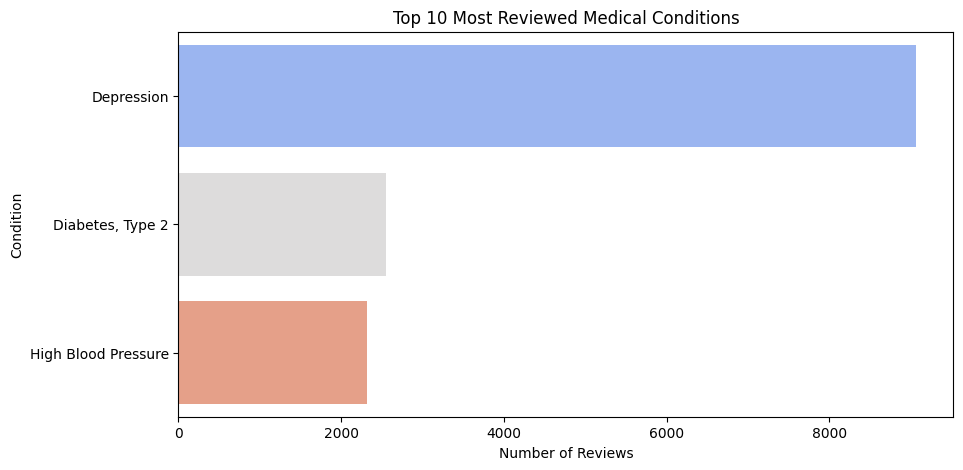

In [37]:
# Most Common Medical Conditions
top_conditions = data['condition'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_conditions.values, y=top_conditions.index, palette='coolwarm')
plt.title('Top 10 Most Reviewed Medical Conditions')
plt.xlabel('Number of Reviews')
plt.ylabel('Condition')
plt.show()

C:\Users\Smrithi\AppData\Local\Temp\ipykernel_60364\1034613805.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=data, palette='viridis')


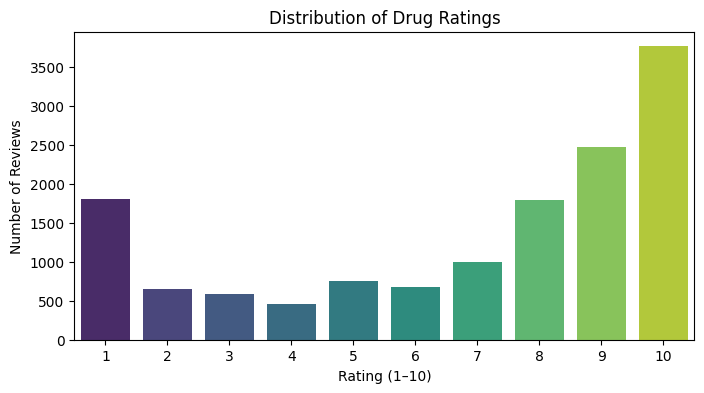

In [38]:
# Distribution of Drug Ratings
plt.figure(figsize=(8, 4))
sns.countplot(x='rating', data=data, palette='viridis')
plt.title('Distribution of Drug Ratings')
plt.xlabel('Rating (1–10)')
plt.ylabel('Number of Reviews')
plt.show()

C:\Users\Smrithi\AppData\Local\Temp\ipykernel_60364\1333921635.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_drugs.values, y=top_drugs.index, palette='cubehelix')


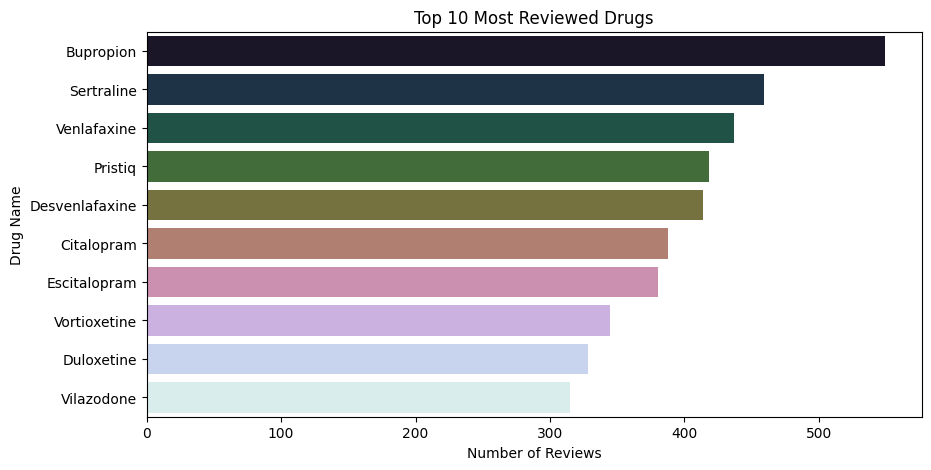

In [39]:
# Most Reviewed Drugs
top_drugs = data['drugName'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_drugs.values, y=top_drugs.index, palette='cubehelix')
plt.title('Top 10 Most Reviewed Drugs')
plt.xlabel('Number of Reviews')
plt.ylabel('Drug Name')
plt.show()

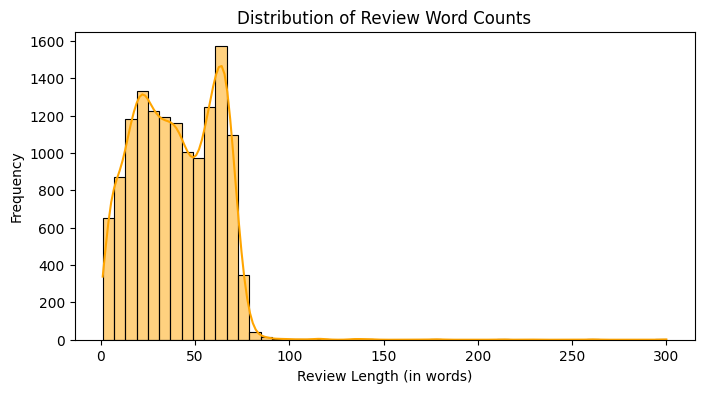

In [40]:
# Distribution of Review Lengths
data['review_length'] = data['clean_review'].apply(lambda x: len(x.split()))

# Plot the distribution
plt.figure(figsize=(8, 4))
sns.histplot(data['review_length'], bins=50, kde=True, color='orange')
plt.title('Distribution of Review Word Counts')
plt.xlabel('Review Length (in words)')
plt.ylabel('Frequency')
plt.show()

C:\Users\Smrithi\AppData\Local\Temp\ipykernel_60364\1134290312.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=data, palette='Set2')


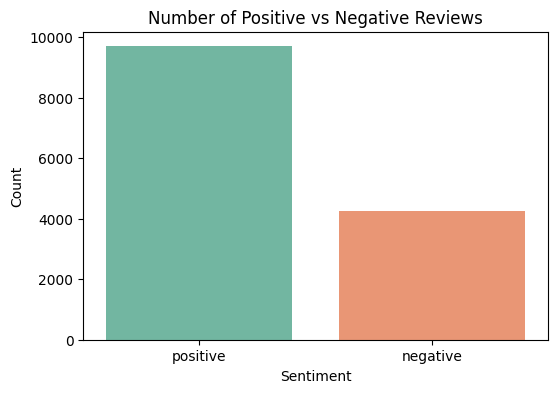

In [41]:
# Sentiment Distribution
data['Sentiment'] = data['rating'].apply(lambda x: 'positive' if x >= 6 else 'negative')

# Plot
plt.figure(figsize=(6, 4))
sns.countplot(x='Sentiment', data=data, palette='Set2')
plt.title('Number of Positive vs Negative Reviews')
plt.ylabel('Count')
plt.show()

**Bivariate Analysis**

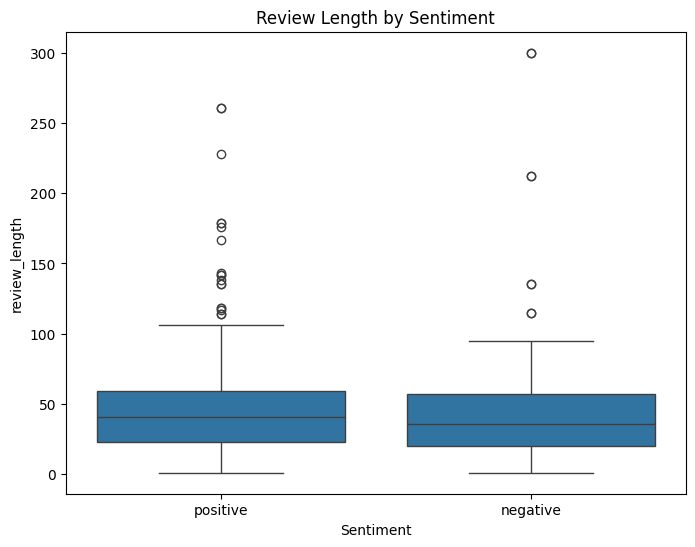

In [43]:
# Review Length vs Sentiment (Boxplot)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sentiment', y='review_length', data=data)
plt.title('Review Length by Sentiment')
plt.show()

In [44]:
# Word Frequency by Rating (1–5 Stars Only)
from collections import Counter
import matplotlib.pyplot as plt

# Ensure ratings are integers and filter only valid 1–5 ratings
data = data[data['rating'].isin([1, 2, 3, 4, 5,6,7,8,9,10])]

# Create a dictionary to hold word counts for each rating
rating_word_counts = {}

for rating in range(1, 11):
    # Filter reviews for this rating
    subset = data[data['rating'] == rating]

    # Combine all cleaned reviews into one big string
    all_text = " ".join(subset['clean_review'])

    # Split into words and count frequencies
    word_freq = Counter(all_text.split())

    # Save top 10 words for this rating
    rating_word_counts[rating] = word_freq.most_common(10)

# Display word frequency results
for rating in rating_word_counts:
    print(f"\nTop words for Rating {rating}:")
    for word, count in rating_word_counts[rating]:
        print(f"{word}: {count}")



Top words for Rating 1:
day: 1062
taking: 758
week: 721
mg: 706
month: 577
medication: 569
drug: 568
effect: 559
doctor: 537
side: 511

Top words for Rating 2:
day: 383
mg: 341
week: 310
taking: 302
effect: 280
side: 237
medication: 212
month: 207
feel: 205
started: 196

Top words for Rating 3:
mg: 356
day: 348
taking: 280
effect: 277
week: 255
side: 255
started: 200
month: 197
feel: 184
depression: 182

Top words for Rating 4:
mg: 298
day: 268
taking: 218
week: 212
effect: 211
side: 206
started: 192
feel: 169
month: 167
doctor: 150

Top words for Rating 5:
mg: 454
day: 439
week: 381
effect: 376
taking: 331
side: 329
month: 267
year: 262
feel: 254
started: 250

Top words for Rating 6:
mg: 415
day: 396
effect: 331
taking: 315
week: 313
side: 309
month: 305
depression: 271
year: 259
feel: 239

Top words for Rating 7:
mg: 751
day: 581
effect: 544
side: 502
taking: 489
depression: 469
week: 465
year: 437
feel: 418
month: 396

Top words for Rating 8:
mg: 1230
effect: 1056
day: 1017
side: 9

C:\Users\Smrithi\AppData\Local\Temp\ipykernel_60364\3298901596.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='coolwarm')


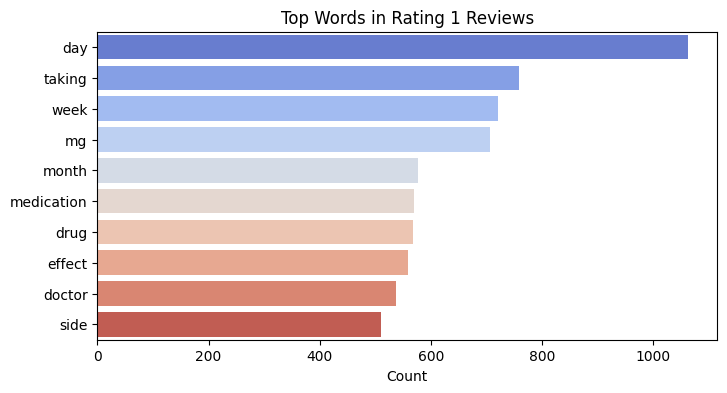

C:\Users\Smrithi\AppData\Local\Temp\ipykernel_60364\3298901596.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='coolwarm')


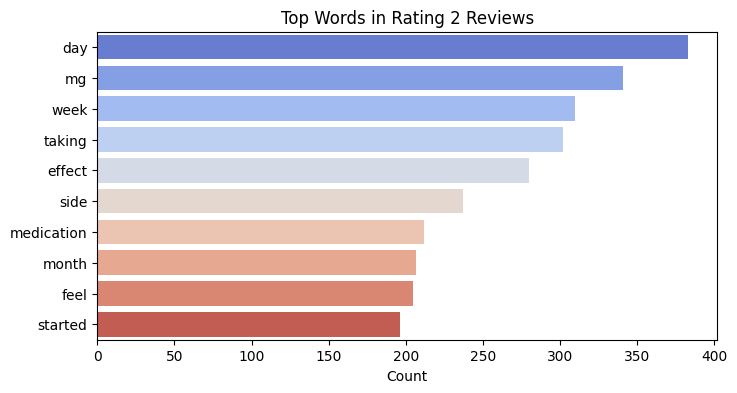

C:\Users\Smrithi\AppData\Local\Temp\ipykernel_60364\3298901596.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='coolwarm')


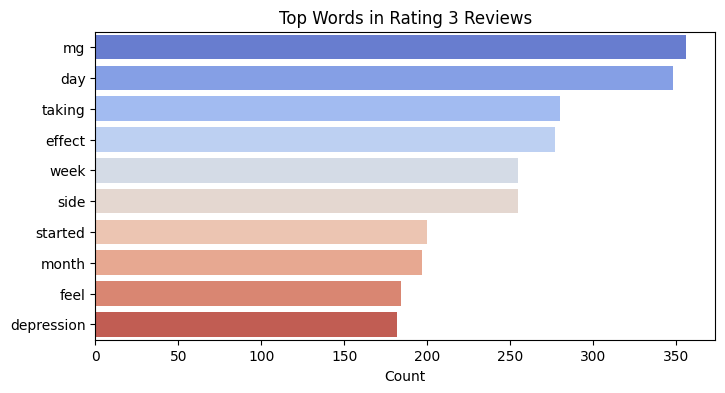

C:\Users\Smrithi\AppData\Local\Temp\ipykernel_60364\3298901596.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='coolwarm')


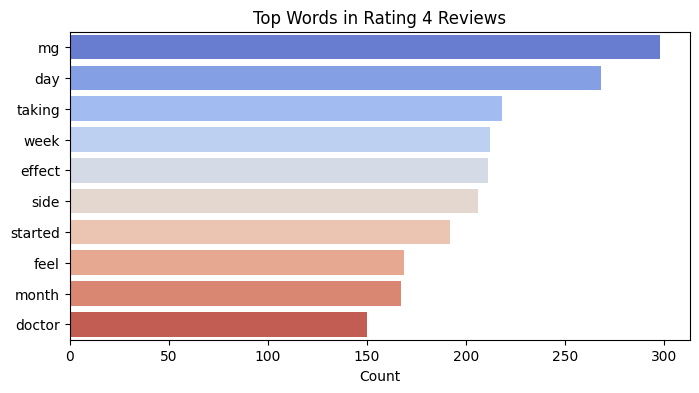

C:\Users\Smrithi\AppData\Local\Temp\ipykernel_60364\3298901596.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='coolwarm')


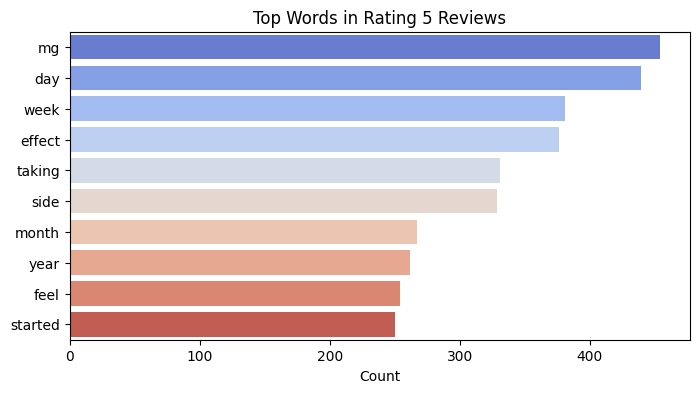

C:\Users\Smrithi\AppData\Local\Temp\ipykernel_60364\3298901596.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='coolwarm')


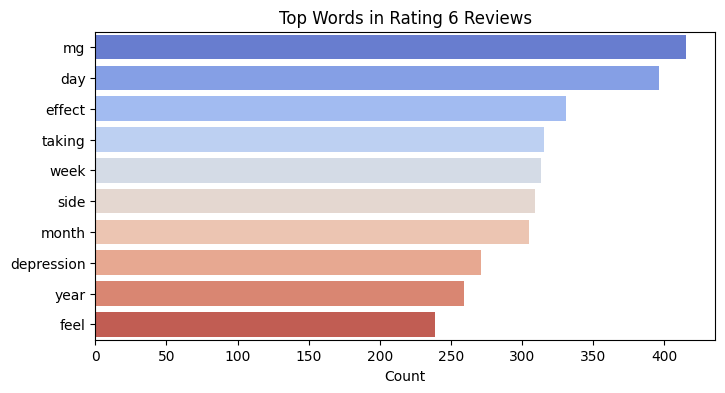

C:\Users\Smrithi\AppData\Local\Temp\ipykernel_60364\3298901596.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='coolwarm')


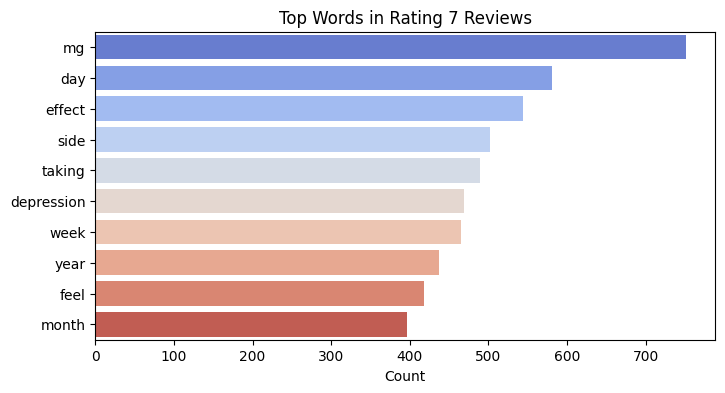

C:\Users\Smrithi\AppData\Local\Temp\ipykernel_60364\3298901596.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='coolwarm')


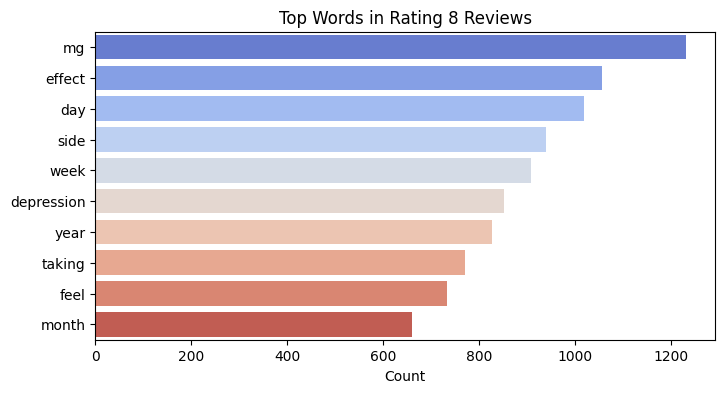

C:\Users\Smrithi\AppData\Local\Temp\ipykernel_60364\3298901596.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='coolwarm')


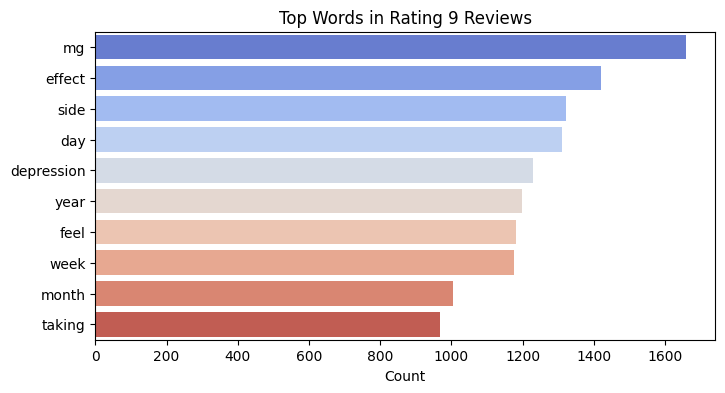

C:\Users\Smrithi\AppData\Local\Temp\ipykernel_60364\3298901596.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='coolwarm')


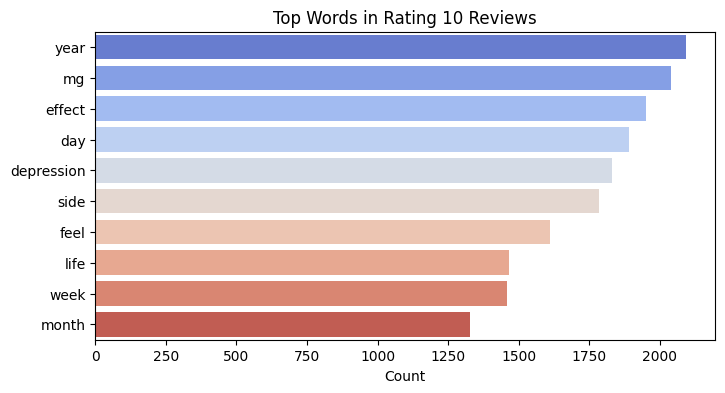

In [45]:
# Plot word frequencies
for rating, word_freq in rating_word_counts.items():
    words, counts = zip(*word_freq)
    plt.figure(figsize=(8, 4))
    sns.barplot(x=list(counts), y=list(words), palette='coolwarm')
    plt.title(f'Top Words in Rating {rating} Reviews')
    plt.xlabel('Count')
    plt.show()

In [46]:
# N-Gram Analysis
from nltk.util import ngrams

def get_ngrams(texts, n):
    all_ngrams = []
    stop_words = set(stopwords.words('english'))

    for text in texts:
        text = preprocess_text(text)
        tokens = [word for word in text.split() if word not in stop_words]
        n_grams = list(ngrams(tokens, n))
        all_ngrams.extend(n_grams)

    return Counter(all_ngrams).most_common(15)

# Bigram Analysis
top_bigrams = get_ngrams(data['review'], 2)
print("Top Bigrams:", top_bigrams)

# Trigram Analysis
top_trigrams = get_ngrams(data['review'], 3)
print("Top Trigrams:", top_trigrams)

Top Bigrams: [(('side', 'effect'), 6042), (('blood', 'pressure'), 1951), (('feel', 'like'), 1038), (('blood', 'sugar'), 901), (('started', 'taking'), 898), (('depression', 'anxiety'), 791), (('mg', 'day'), 691), (('first', 'week'), 673), (('weight', 'gain'), 649), (('much', 'better'), 636), (('year', 'ago'), 567), (('panic', 'attack'), 564), (('taking', 'mg'), 545), (('felt', 'like'), 525), (('year', 'old'), 520)]
Top Trigrams: [(('high', 'blood', 'pressure'), 338), (('sexual', 'side', 'effect'), 229), (('feel', 'much', 'better'), 222), (('bad', 'side', 'effect'), 147), (('negative', 'side', 'effect'), 126), (('mg', 'per', 'day'), 110), (('mg', 'twice', 'day'), 99), (('first', 'two', 'week'), 99), (('blood', 'sugar', 'level'), 97), (('week', 'side', 'effect'), 97), (('side', 'effect', 'first'), 93), (('year', 'old', 'female'), 89), (('many', 'side', 'effect'), 89), (('experienced', 'side', 'effect'), 87), (('day', 'side', 'effect'), 87)]


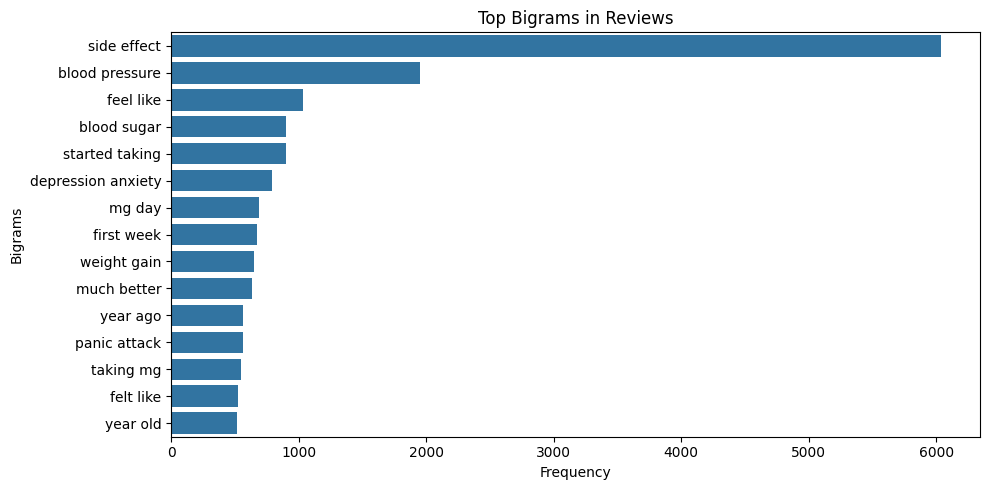

In [47]:
# Plot Top Bigrams
bigram_words = [' '.join(gram) for gram, count in top_bigrams]
bigram_counts = [count for gram, count in top_bigrams]

plt.figure(figsize=(10, 5))
sns.barplot(x=bigram_counts, y=bigram_words)
plt.title("Top Bigrams in Reviews")
plt.xlabel("Frequency")
plt.ylabel("Bigrams")
plt.tight_layout()
plt.show()

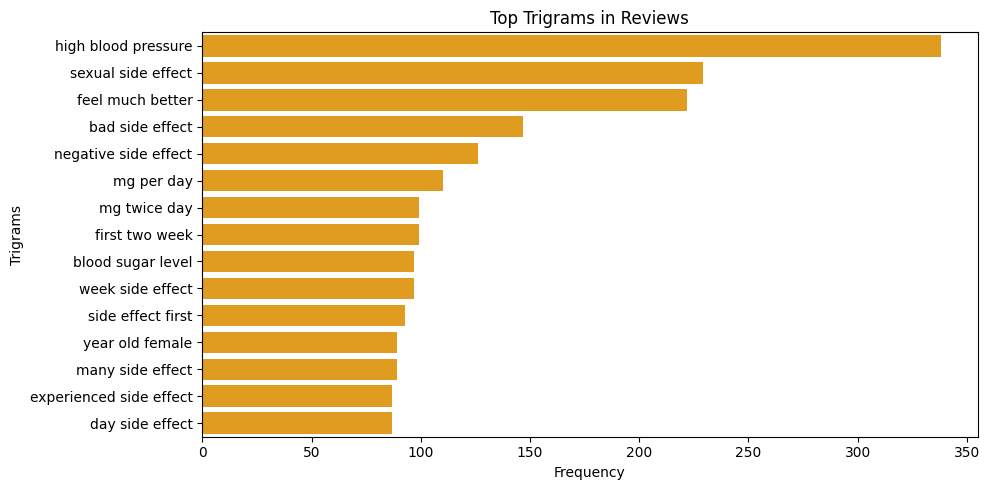

In [48]:
# Plot Top Trigrams
trigram_words = [' '.join(gram) for gram, count in top_trigrams]
trigram_counts = [count for gram, count in top_trigrams]

plt.figure(figsize=(10, 5))
sns.barplot(x=trigram_counts, y=trigram_words, color='orange')
plt.title("Top Trigrams in Reviews")
plt.xlabel("Frequency")
plt.ylabel("Trigrams")
plt.tight_layout()
plt.show()

In [49]:
data

,drugName,condition,review,rating,date,usefulCount,clean_review,review_length,Sentiment
0,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10,2017-03-09,54,taken anti depressant year improvement mostly ...,43,positive
1,Sertraline,Depression,"""1 week on Zoloft for anxiety and mood swings....",8,2011-05-07,3,week zoloft anxiety mood swing take mg morning...,28,positive
2,Venlafaxine,Depression,"""my gp started me on Venlafaxine yesterday to ...",4,2016-04-27,3,gp started venlafaxine yesterday help depressi...,69,negative
3,Dulaglutide,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l...",10,2017-10-24,24,hey guy month since last post wanted give mont...,63,positive
4,Effexor XR,Depression,"""This medicine saved my life. I was at my wits...",10,2013-06-20,166,medicine saved life wit end anti depressant re...,51,positive
...,...,...,...,...,...,...,...,...,...
13939,Metoprolol,High Blood Pressure,"""It is fourth blood pressure pill for me. It f...",4,2009-07-15,39,fourth blood pressure pill feel like partly wo...,18,negative
13940,Bystolic,High Blood Pressure,"""While on Bystolic my feet and arms were numb....",1,2009-07-18,25,bystolic foot arm numb blood sugar became seve...,36,negative
13941,Invokana,"Diabetes, Type 2","""I just got diagnosed with type 2. My doctor p...",9,2015-10-23,47,got diagnosed type doctor prescribed invokana ...,21,positive
13942,Vortioxetine,Depression,"""This is the third med I&#039;ve tried for anx...",2,2016-07-17,33,third med tried anxiety mild depression week h...,19,negative


In [50]:
# Number of unique values in the Sentiment column
data['Sentiment'].nunique()

2

In [52]:
data['rating'].nunique()

10

In [55]:
# Returns a NumPy array of all the unique sentiment labels
data['Sentiment'].unique()

array(['positive', 'negative'], dtype=object)

In [57]:
data['drugName'].nunique()

334

In [60]:
# Convert categorical into numerical
data['Sentiment_encoded'] = data['Sentiment'].map({
    'negative': 0,
    'positive': 1
})

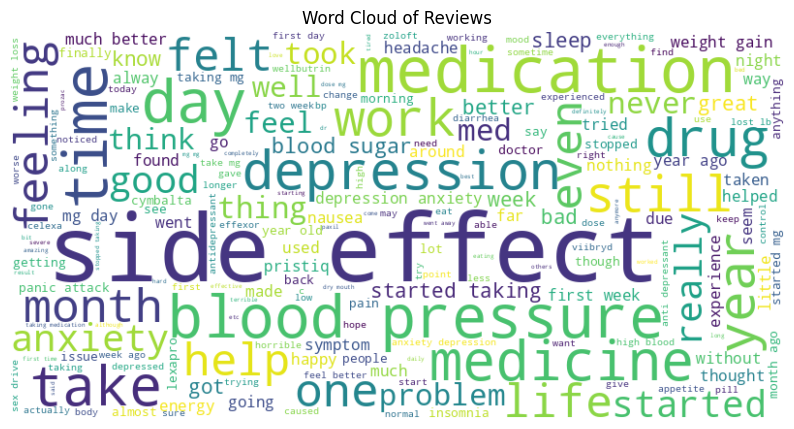

In [63]:
# Word Cloud for all the reviews
from wordcloud import WordCloud
all_reviews = ' '.join(data['clean_review'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Reviews")
plt.show()

**Analyzes the top 20 most common words in your text reviews using CountVectorizer.**

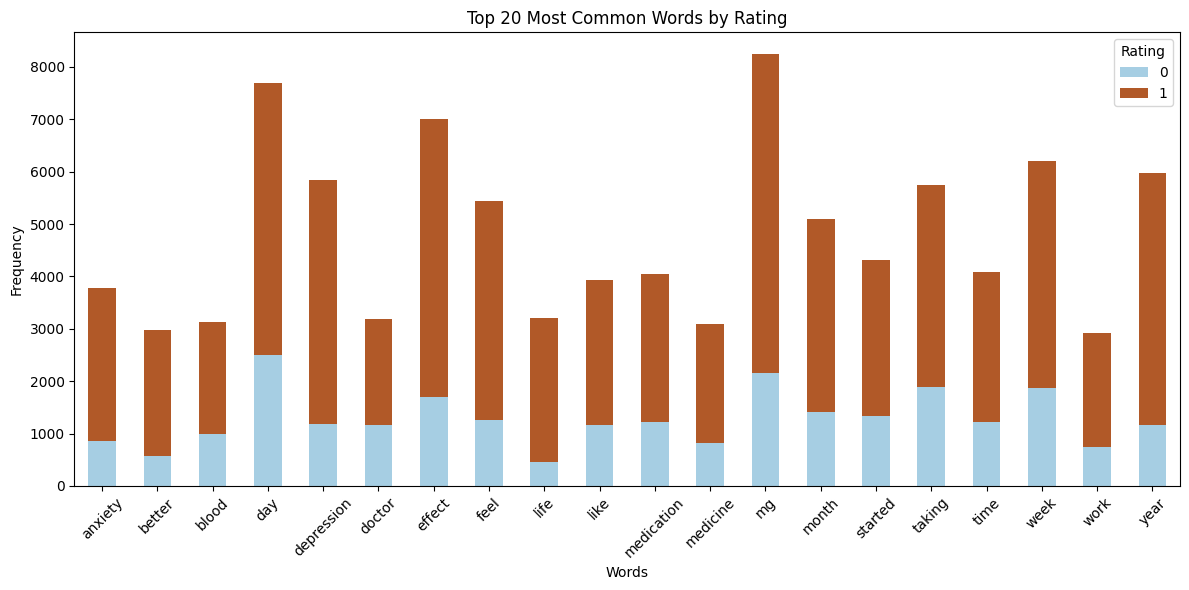

In [66]:
# CountVectorizer - most common words
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the Vectorizer
vectorizer = CountVectorizer(max_features=20, stop_words='english')
X = vectorizer.fit_transform(data['clean_review'])

# Convert to DataFrame
word_count = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Add Sentimental Labels
word_count['Sentiment_encoded'] = data['Sentiment_encoded']

# Group by Sentiment and Sum Word Counts
grouped = word_count.groupby('Sentiment_encoded').sum()
grouped.T.plot(kind='bar', figsize=(12, 6), colormap='Paired', stacked=True)

# Plot the Bar Chart
plt.title("Top 20 Most Common Words by Rating")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.legend(title="Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**TF-IDF Analysis**

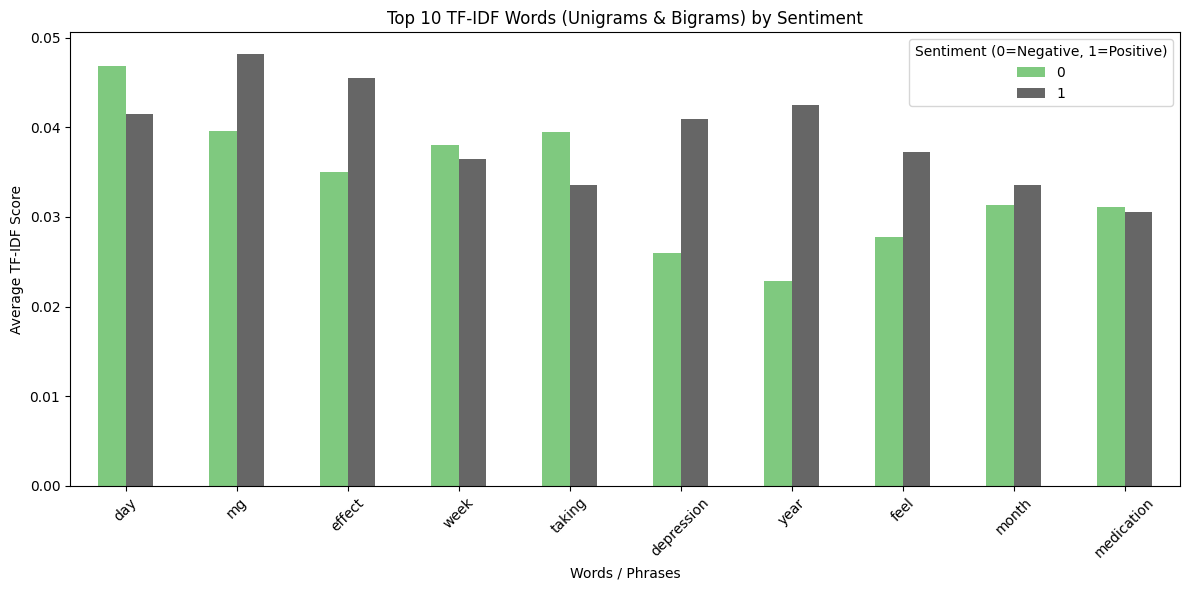

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import matplotlib.pyplot as plt

# Filter rows with valid sentiment encoding
filtered_data = data[data['Sentiment_encoded'].notna()]

# TF-IDF Vectorizer
tfidf = TfidfVectorizer(
    max_features=1000,        # top 1000 terms
    stop_words='english',
    ngram_range=(1, 2),
    min_df=5,
    max_df=0.8
)

# Apply TF-IDF to filtered data
X_tfidf = tfidf.fit_transform(filtered_data['clean_review'])

# Convert to DataFrame
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Add sentiment labels
tfidf_df['Sentiment_encoded'] = filtered_data['Sentiment_encoded'].values

# Group by sentiment and calculate average TF-IDF
grouped_tfidf = tfidf_df.groupby('Sentiment_encoded').mean()

# Select top 10 terms by average across both sentiments
top10_terms = grouped_tfidf.mean().sort_values(ascending=False).head(10).index

# Subset only the top 10 terms
grouped_tfidf_top10 = grouped_tfidf[top10_terms]

# Plotting
grouped_tfidf_top10.T.plot(kind='bar', figsize=(12, 6), colormap='Accent', stacked=False)
plt.title("Top 10 TF-IDF Words (Unigrams & Bigrams) by Sentiment")
plt.xlabel("Words / Phrases")
plt.ylabel("Average TF-IDF Score")
plt.legend(title="Sentiment (0=Negative, 1=Positive)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


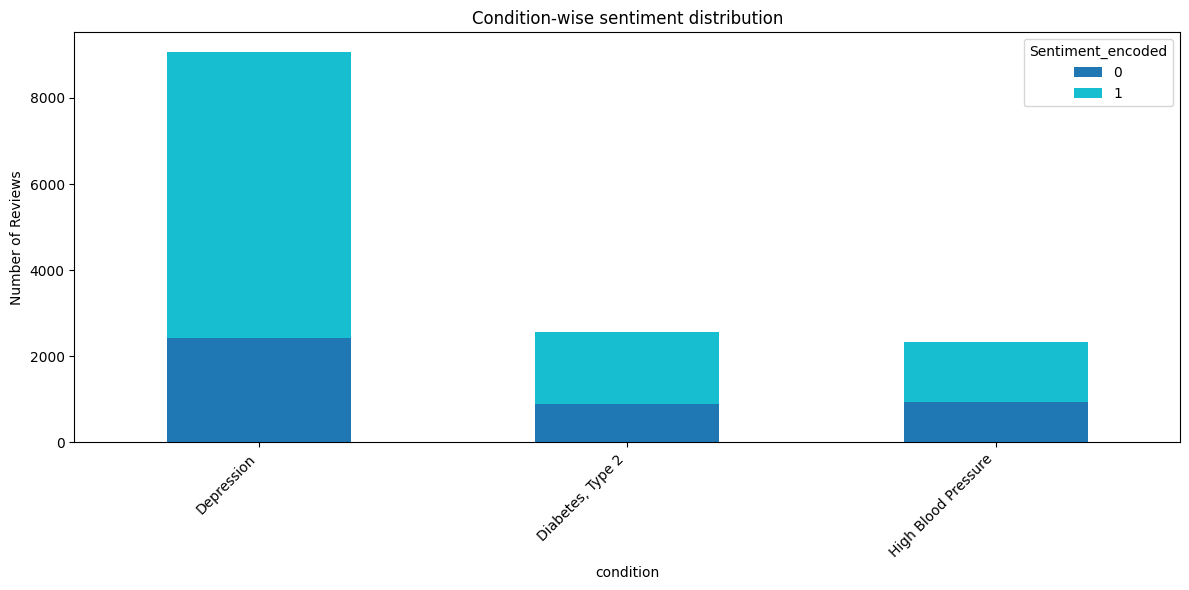

In [69]:
# Condition vs Sentiment
variation_feedback = data.groupby(['condition', 'Sentiment_encoded']).size().unstack().fillna(0)
variation_feedback.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab10')
plt.title('Condition-wise sentiment distribution')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# **Model Building**

  **Logistic Regression**

In [72]:
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [86]:
# Filter target conditions and remove empty reviews
target_conditions = ["Depression", "High Blood Pressure", "Diabetes, Type 2"]
data = data[data["condition"].isin(target_conditions)].dropna(subset=["review"]).copy()

In [89]:
# Convert condition names to numeric labels
label_map = {
    "Depression": 0,
    "High Blood Pressure": 1,
    "Diabetes, Type 2": 2
}
data["label"] = data["condition"].map(label_map)

In [91]:
# Clean the review text
def clean_text(text):
    text = text.lower()
    text = re.sub(r"<.*?>", "", text)
    text = re.sub(r"http\S+", "", text)
    text = text.translate(str.maketrans("", "", string.punctuation))
    text = re.sub(r"\d+", "", text)
    return text.strip()

data["clean_review"] = data["review"].apply(clean_text)

In [93]:
# Define features and labels
X = data["clean_review"]
y = data["label"]

In [103]:
# Split dataset into train and test sets using 80/20 ratio
X_train, X_test, y_train, y_test = train_test_split(
    data["clean_review"], data["label"], test_size=0.2, stratify=data["label"], random_state=42
)

In [105]:
# Convert text into numerical format using TF-IDF with 5000 most important words
tfidf = TfidfVectorizer(max_features=5000)
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)

In [106]:
# Train a Logistic Regression classifier model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

LogisticRegression(max_iter=1000)

In [108]:
# Predict
y_pred = model.predict(X_test_vec)

In [109]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Overall metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Overall Evaluation Metrics:")
print(f"Accuracy   : {accuracy:.4f}")
print(f"Precision  : {precision:.4f}")
print(f"Recall     : {recall:.4f}")
print(f"F1 Score   : {f1:.4f}")

# Classification report (per class)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=label_map.keys()))

Overall Evaluation Metrics:
Accuracy   : 0.9477
Precision  : 0.9479
Recall     : 0.9477
F1 Score   : 0.9467

Classification Report:

                     precision    recall  f1-score   support

         Depression       0.94      0.99      0.96      1814
High Blood Pressure       0.95      0.84      0.89       464
   Diabetes, Type 2       0.96      0.91      0.94       511

           accuracy                           0.95      2789
          macro avg       0.95      0.91      0.93      2789
       weighted avg       0.95      0.95      0.95      2789



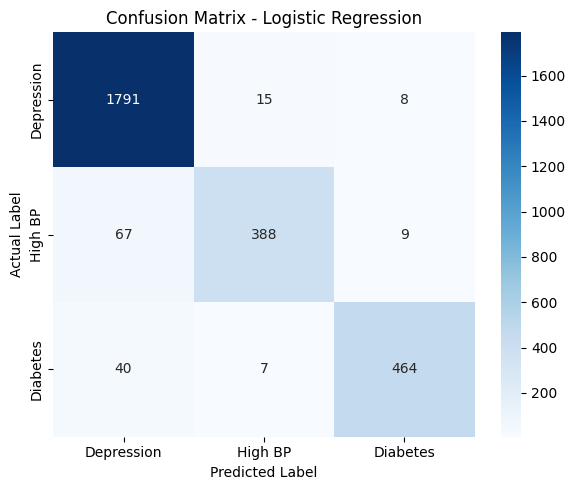

In [113]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# Confusion Matrix
cm_log = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Depression', 'High BP', 'Diabetes'],
            yticklabels=['Depression', 'High BP', 'Diabetes'])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - Logistic Regression")
plt.tight_layout()
plt.show()

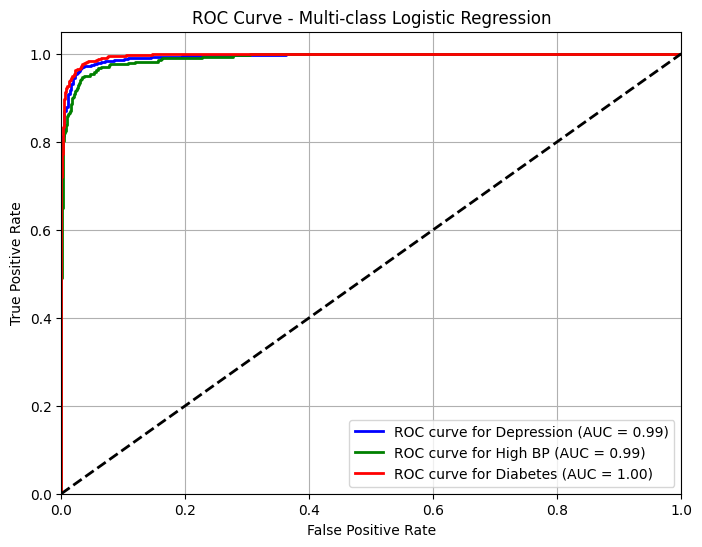

In [115]:
# ROC curve

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
import numpy as np

# Binarize the output labels
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Get predicted probabilities
y_prob = model.predict_proba(X_test_vec)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(8, 6))

colors = ['blue', 'green', 'red']
class_names = ['Depression', 'High BP', 'Diabetes']

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve for {class_names[i]} (AUC = {roc_auc[i]:0.2f})')

# Plot diagonal
plt.plot([0, 1], [0, 1], 'k--', lw=2)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multi-class Logistic Regression')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)

MultinomialNB()

In [ ]:
# Predict on test data
y_pred_nb = nb_model.predict(X_test_vec)

In [ ]:
# Classification report
print("Classification Report (Naive Bayes):\n")
print(classification_report(y_test, y_pred_nb, target_names=label_map.keys()))

# Overall metrics
accuracy = accuracy_score(y_test, y_pred_nb)
precision = precision_score(y_test, y_pred_nb, average='weighted')
recall = recall_score(y_test, y_pred_nb, average='weighted')
f1 = f1_score(y_test, y_pred_nb, average='weighted')

print("Overall Evaluation Metrics (Naive Bayes):")
print(f"Accuracy     : {accuracy:.4f}")
print(f"Precision    : {precision:.4f}")
print(f"Recall       : {recall:.4f}")
print(f"F1 Score     : {f1:.4f}")

Classification Report (Naive Bayes):

                     precision    recall  f1-score   support

         Depression       0.89      1.00      0.94      1814
High Blood Pressure       0.97      0.70      0.81       464
   Diabetes, Type 2       0.98      0.83      0.90       511

           accuracy                           0.92      2789
          macro avg       0.95      0.84      0.88      2789
       weighted avg       0.92      0.92      0.91      2789

Overall Evaluation Metrics (Naive Bayes):
Accuracy     : 0.9150
Precision    : 0.9209
Recall       : 0.9150
F1 Score     : 0.9113


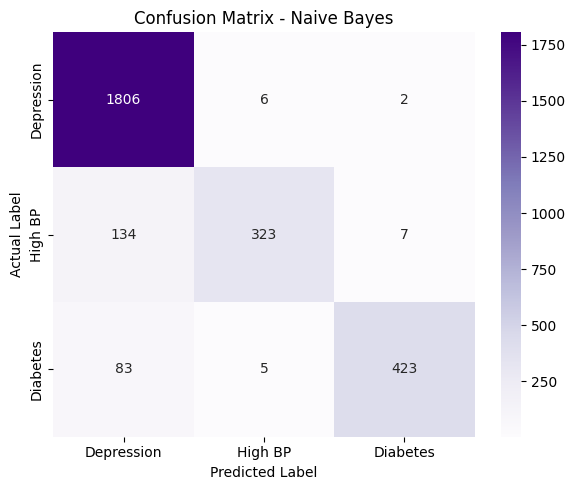

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

cm_nb = confusion_matrix(y_test, y_pred_nb)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Depression', 'High BP', 'Diabetes'],
            yticklabels=['Depression', 'High BP', 'Diabetes'])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - Naive Bayes")
plt.tight_layout()
plt.show()

ROC Curve

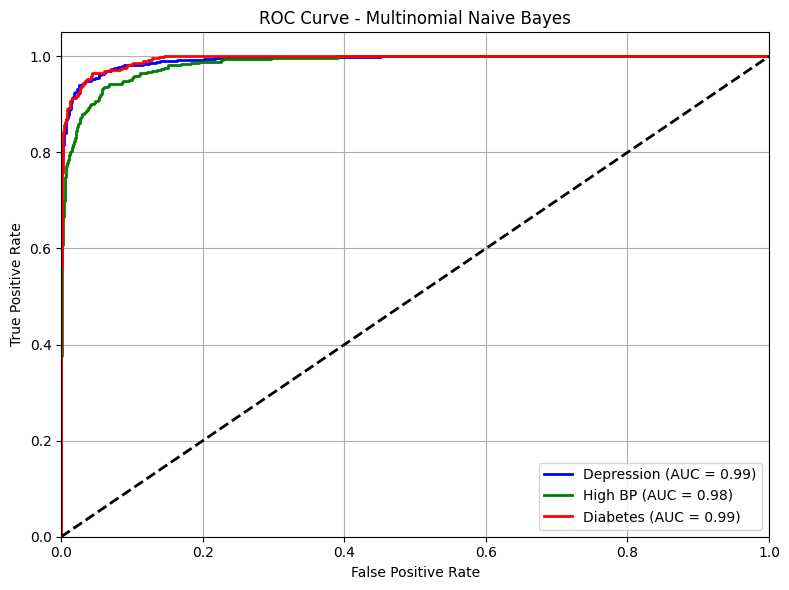

AUC Scores:
Macro AUC: 0.990
Micro AUC: 0.987


In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# Predict probabilities for ROC
y_score = nb_model.predict_proba(X_test_vec)

# Binarize the test labels for multiclass ROC
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_binarized.shape[1]

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']
labels = ['Depression', 'High BP', 'Diabetes']

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label=f"{labels[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multinomial Naive Bayes')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# Print Macro and Micro AUC
print("AUC Scores:")
print("Macro AUC: %.3f" % roc_auc_score(y_test_binarized, y_score, average='macro'))
print("Micro AUC: %.3f" % roc_auc_score(y_test_binarized, y_score, average='micro'))


**Passive Aggressive Classifier with TF-IDF**

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the classifier
pac_model = PassiveAggressiveClassifier(max_iter=1000, random_state=42)

# Train the model
pac_model.fit(X_train_vec, y_train)

# Predict
y_pred_pac = pac_model.predict(X_test_vec)

# Evaluation
print("Classification Report (Passive-Aggressive Classifier):\n")
print(classification_report(y_test, y_pred_pac, target_names=label_map.keys()))

accuracy = accuracy_score(y_test, y_pred_pac)
precision = precision_score(y_test, y_pred_nb, average='weighted')
recall = recall_score(y_test, y_pred_nb, average='weighted')
f1 = f1_score(y_test, y_pred_nb, average='weighted')

print("Overall Evaluation Metric")
print(f"Accuracy     : {accuracy:.4f}")
print(f"Precision    : {precision:.4f}")
print(f"Recall       : {recall:.4f}")
print(f"F1 Score     : {f1:.4f}")


Classification Report (Passive-Aggressive Classifier):

                     precision    recall  f1-score   support

         Depression       0.97      0.98      0.98      1814
High Blood Pressure       0.94      0.91      0.92       464
   Diabetes, Type 2       0.96      0.95      0.95       511

           accuracy                           0.96      2789
          macro avg       0.96      0.95      0.95      2789
       weighted avg       0.96      0.96      0.96      2789

Overall Evaluation Metric
Accuracy     : 0.9634
Precision    : 0.9209
Recall       : 0.9150
F1 Score     : 0.9113


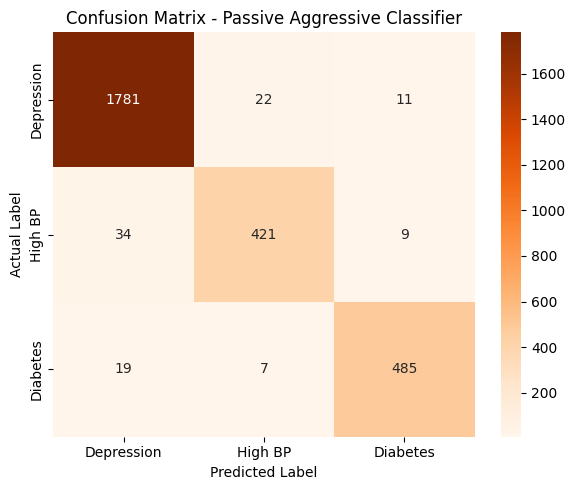

In [ ]:
# Compute confusion matrix
cm_pac = confusion_matrix(y_test, y_pred_pac)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_pac, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Depression', 'High BP', 'Diabetes'],
            yticklabels=['Depression', 'High BP', 'Diabetes'])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - Passive Aggressive Classifier")
plt.tight_layout()
plt.show()

ROC Curve for Multiclass (OvR) with decision_function

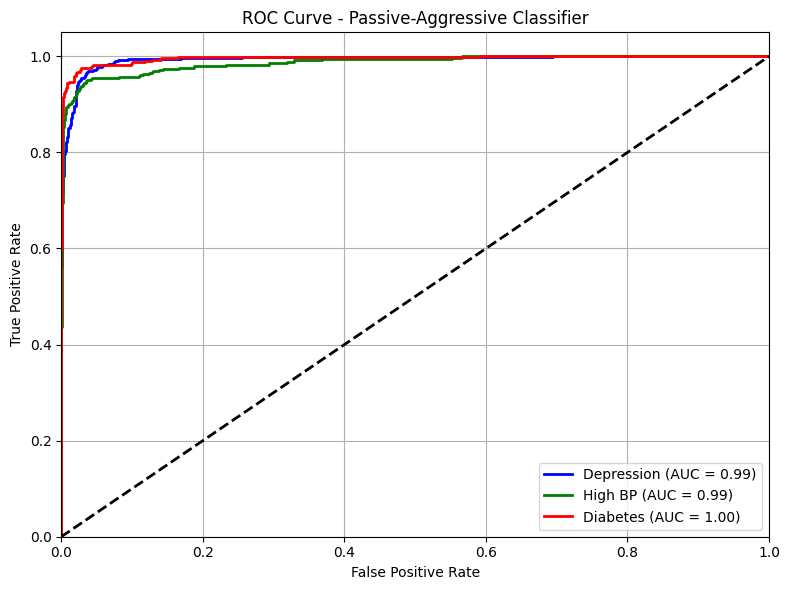

AUC Scores:
Macro AUC: 0.992
Micro AUC: 0.994


In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Get decision scores (not probabilities!)
y_score = pac_model.decision_function(X_test_vec)

# Binarize test labels
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Compute ROC and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']
labels = ['Depression', 'High BP', 'Diabetes']

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label=f"{labels[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Passive-Aggressive Classifier')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# Print macro and micro averaged AUC scores
print("AUC Scores:")
print("Macro AUC: %.3f" % roc_auc_score(y_test_bin, y_score, average='macro'))
print("Micro AUC: %.3f" % roc_auc_score(y_test_bin, y_score, average='micro'))

**Most Important Features**

In [ ]:
def most_informative_feature_for_class(vectorizer, classifier, classlabel, n=10):
    labelid = list(classifier.classes_).index(classlabel)  # get index of the class
    feature_names = vectorizer.get_feature_names_out()     # all feature names (tokens)
    class_coefs = classifier.coef_[labelid]

    # Get top `n` features for the specified class by weight (coefficient)
    topn = sorted(zip(class_coefs, feature_names), reverse=True)[:n]

    # Print them
    for coef, feat in topn:
        print(classlabel, feat, coef)


These are the top 10 features that the model found most useful in identifying a review.

In [ ]:
# Depression
most_informative_feature_for_class(tfidf, pac_model, 0)

0 depression 12.961082554898393
0 wellbutrin 8.466229408600734
0 pristiq 7.616112410453892
0 fetzima 7.447924830324724
0 zoloft 7.258405710048104
0 antidepressant 6.130983895168776
0 viibryd 6.069525110707827
0 cymbalta 6.016948128720695
0 lexapro 5.9857940500122435
0 effexor 5.748803093456829


In [ ]:
# High BP
most_informative_feature_for_class(tfidf, pac_model, 1)

1 bp 10.50221215239712
1 pressure 9.819357146415967
1 lisinopril 9.635092928407914
1 bystolic 6.463032595747535
1 atenolol 6.167922759362377
1 diovan 5.9768159152800315
1 metoprolol 5.845556222246993
1 cough 5.8350499559997715
1 losartan 5.650108721948355
1 benicar 5.489990190275055


In [ ]:
# Diabetes
most_informative_feature_for_class(tfidf, pac_model, 2)

2 metformin 8.966508821006222
2 victoza 8.576750377548683
2 sugar 8.105666148381973
2 invokana 7.143037996242937
2 trulicity 7.015610051326858
2 ac 6.56212066855741
2 byetta 5.889820298740283
2 injection 5.600692675478792
2 sugars 5.475817589827561
2 januvia 5.043935639796779


**Support Vector Machine**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [ ]:
# Train - test split
X = data['clean_review']
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Text Vectorization (TF-IDF)
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
# Train SVM Classifier
svm_model = SVC(kernel='linear', C=1, random_state=42)
svm_model.fit(X_train_vec, y_train)

SVC(C=1, kernel='linear', random_state=42)

In [ ]:
 # Evaluate the Model

y_pred = svm_model.predict(X_test_vec)

print("Accuracy   :", accuracy_score(y_test, y_pred))
print("Precision  :",precision_score(y_test, y_pred_nb, average='weighted'))
print("Recall     :", recall_score(y_test, y_pred_nb, average='weighted'))
print("F1_score   :", f1_score(y_test, y_pred_nb, average='weighted'))

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy   : 0.9580494801003944
Precision  : 0.48024830470475927
Recall     : 0.5177482968806024
F1_score   : 0.496376562688437

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1800
           1       0.94      0.87      0.90       488
           2       0.97      0.94      0.96       501

    accuracy                           0.96      2789
   macro avg       0.96      0.93      0.94      2789
weighted avg       0.96      0.96      0.96      2789



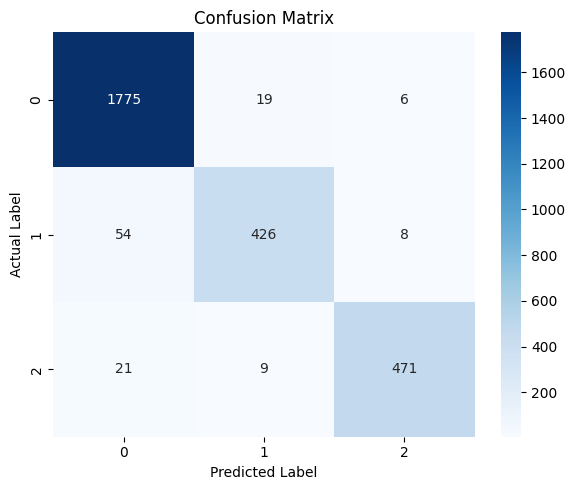

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# Confusion Matrix
cm = metrics.confusion_matrix(y_test, y_pred, labels=[0, 1, 2])

# Plotting Confusion Matrix
def plot_confusion_matrix(cm, classes, title='Confusion Matrix'):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

# Call the function
plot_confusion_matrix(cm, classes=[0, 1, 2])

In [ ]:
# ROC AUC Score for Multi-Class
# Since your target has 3 classes, use roc_auc_score with multi_class='ovr' (One-vs-Rest strategy).

from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarize the output labels for ROC AUC (One-hot encoding)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_bin = label_binarize(y_pred, classes=[0, 1, 2])

# Compute ROC AUC Score (macro-average)
auc_score = roc_auc_score(y_test_bin, y_pred_bin, average='macro', multi_class='ovr')
print("ROC AUC Score (macro):", auc_score)


ROC AUC Score (macro): 0.9508433353116669


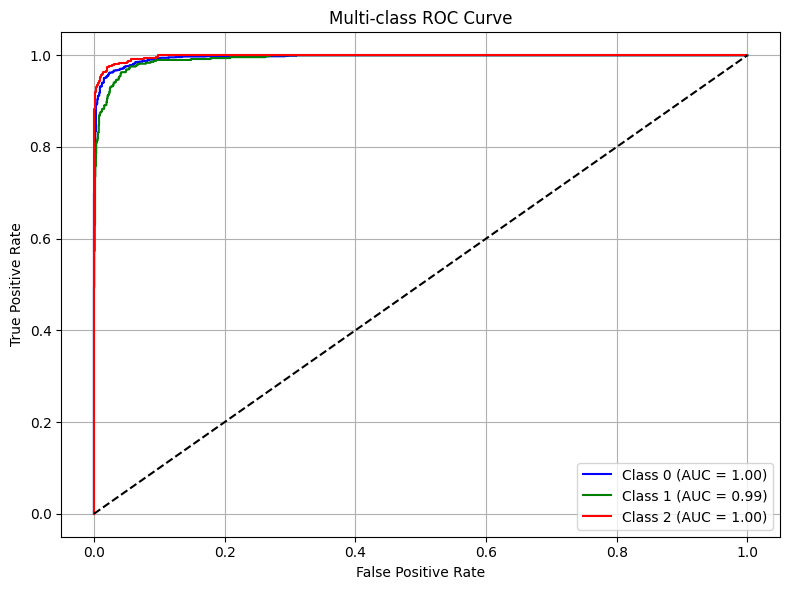

In [ ]:
# ROC Curve
# To plot the ROC curve, use the decision function or probability scores (SVM with probability=True):

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Re-train with probability=True if not already
svm_model = SVC(kernel='linear', C=1, probability=True, random_state=42)
svm_model.fit(X_train_vec, y_train)

# Predict probabilities
y_score = svm_model.predict_proba(X_test_vec)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 3

# Binarize y_test again
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()
